1. For the following training data, build a linear regression model. Assume w and b are
initialized with 1 and learning parameter is set to 0.001.
x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])
Assume learning rate =0.001. Plot the graph of epoch in x axis and loss in y axis. 

[10.153912544250488, 1.4566776752471924, 0.2217213660478592, 0.04636411741375923, 0.021464206278324127, 0.017928212881088257, 0.01742570474743843, 0.01735403947532177, 0.0173435527831316, 0.017341721802949905]


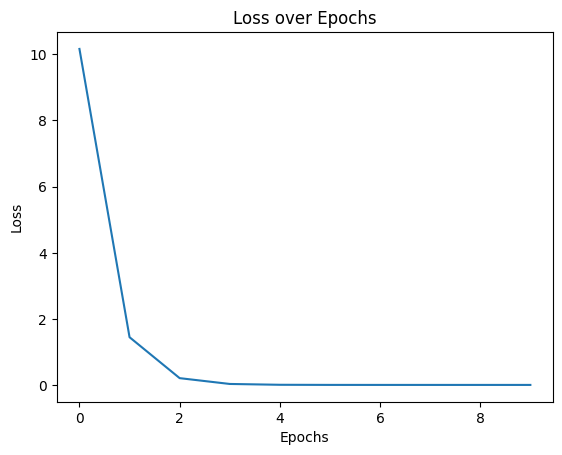

In [3]:
import torch
import matplotlib.pyplot as plt
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2], dtype=torch.float32)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6], dtype=torch.float32)

w=torch.ones(1,requires_grad=True)
b=torch.tensor(1.0, requires_grad=True)
lr = 0.001
epochs = 10
losses=[]
for epoch in range(epochs):
    ypred= w*x+b
    loss=torch.mean((ypred-y)**2)
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

        w.grad.zero_()
        b.grad.zero_()
    losses.append(loss.item())

print(losses)
plt.plot(range(epochs), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.show()

2. Find the value of w.grad, b.grad using analytical solution for the given linear regression problem. Initial value of w = b =1. Learning parameter is set to 0.001. Implement the same and verify the values of w.grad , b.grad and updated parameter values for two epochs. Consider the difference between predicted and target values of y is defined as (yp-y). 

In [19]:
import torch

x = torch.tensor([2.0, 4.0], dtype=torch.float32)
y = torch.tensor([20.0, 40.0], dtype=torch.float32)

w = torch.ones(1, requires_grad=True)
b = torch.ones(1, requires_grad=True)

lr = 0.001
epochs = 2

for epoch in range(epochs):
    y_pred = w * x + b
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()
    print(f"Epoch {epoch + 1}:")
    print(f"w.grad = {w.grad}")
    print(f"b.grad = {b.grad}")

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

        w.grad.zero_()
        b.grad.zero_()

    print(f"Updated w = {w.item()}, b = {b.item()}\n")

Epoch 1:
w.grad = tensor([-174.])
b.grad = tensor([-52.])
Updated w = 1.1740000247955322, b = 1.0520000457763672

Epoch 2:
w.grad = tensor([-170.2080])
b.grad = tensor([-50.8520])
Updated w = 1.344208002090454, b = 1.1028521060943604



3. Revise the linear regression model by defining a user defined class titled RegressionModel with two parameters w and b as its member variables. Define a constructor to initialize w and b with value 1. Define four member functions namely forward(x) to implement wx+b, update() to update w and b values, reset_grad() to reset parameters to zero, criterion(y, yp) to implement MSE Loss given the predicted y value yp and the target label y. Define an object of this class named model and invoke all the methods. Plot the graph of epoch vs loss by varying epoch to 100 iterations.
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = torch.tensor(0.001)

Epoch [0/100], Loss: 25359.80078125
Epoch [10/100], Loss: 486.63970947265625
Epoch [20/100], Loss: 482.1866760253906
Epoch [30/100], Loss: 482.07171630859375
Epoch [40/100], Loss: 481.958740234375
Epoch [50/100], Loss: 481.84625244140625
Epoch [60/100], Loss: 481.7345275878906
Epoch [70/100], Loss: 481.62384033203125
Epoch [80/100], Loss: 481.5135803222656
Epoch [90/100], Loss: 481.4041442871094


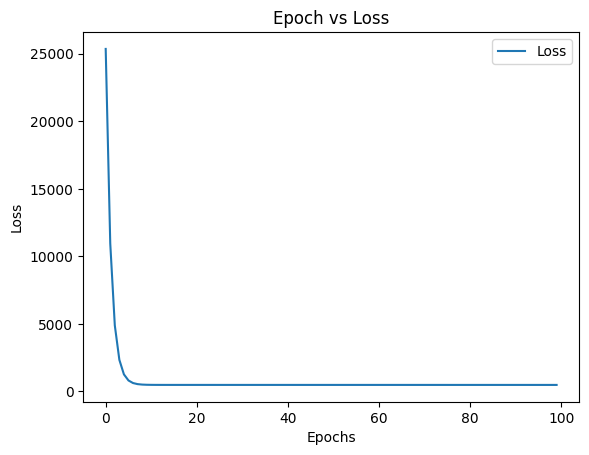

In [4]:
import torch
import matplotlib.pyplot as plt


class RegressionModel:
    def __init__(self):
        self.w = torch.ones(1, requires_grad=True)
        self.b = torch.ones(1, requires_grad=True)

    def forward(self, x):
        return self.w * x + self.b

    def update(self, learning_rate):
        with torch.no_grad():
            self.w -= learning_rate * self.w.grad
            self.b -= learning_rate * self.b.grad
        self.reset_grad()

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

    def criterion(self, y, yp):
        return torch.mean((yp - y) ** 2)

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0], dtype=torch.float32)
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0], dtype=torch.float32)
learning_rate = 0.001
model = RegressionModel()
losses = []
epochs = 100
for epoch in range(epochs):
    y_pred = model.forward(x)
    loss = model.criterion(y, y_pred)
    loss.backward()
    model.update(learning_rate)
    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item()}')

# Plot the loss curve
plt.plot(range(epochs), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend()
plt.show()

4. Convert your program written in Qn 3 to extend nn.module in your model. Also override
the necessary methods to fit the regression line. Illustrate the use of Dataset and DataLoader from torch.utils.data in your implementation. Use the SGD Optimizer torch.optim.SGD()

Epoch [0/101], Loss: 9942.970991420745
Epoch [10/101], Loss: 552.158158493042
Epoch [20/101], Loss: 634.4242298126221
Epoch [30/101], Loss: 677.488882446289
Epoch [40/101], Loss: 640.2932220458985
Epoch [50/101], Loss: 624.0706301689148
Epoch [60/101], Loss: 632.4680297851562
Epoch [70/101], Loss: 643.6708724975585
Epoch [80/101], Loss: 594.4815734863281
Epoch [90/101], Loss: 568.1680847167969
Epoch [100/101], Loss: 618.1761291503906


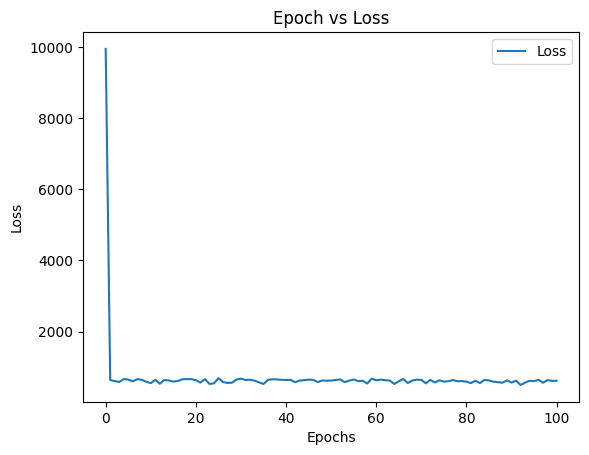

Learned parameters: w = 12.848943710327148, b = 3.9534497261047363


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

class LinearRegressionDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]


# Define the model class extending nn.Module
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.w = nn.Parameter(torch.ones(1))
        self.b = nn.Parameter(torch.ones(1))

    def forward(self, x):
        return self.w * x + self.b

x_data = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0], dtype=torch.float32)
y_data = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0], dtype=torch.float32)

dataset = LinearRegressionDataset(x_data, y_data)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
epochs = 101
losses = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for x_batch, y_batch in dataloader:
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    losses.append(epoch_loss)

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {epoch_loss}')

# Plotting the loss curve
plt.plot(range(epochs), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend()
plt.show()

# Print the final learned parameters
print(f"Learned parameters: w = {model.w.item()}, b = {model.b.item()}")

5. Use PyTorch’s nn.Linear() in your implementation to perform linear regression for the data provided in Qn. 1. Also plot the graph. 

Epoch [1/100], Loss: 168.51071166992188
Epoch [11/100], Loss: 0.04368240386247635
Epoch [21/100], Loss: 0.04365893080830574
Epoch [31/100], Loss: 0.04363624379038811
Epoch [41/100], Loss: 0.04361330345273018
Epoch [51/100], Loss: 0.04359064996242523
Epoch [61/100], Loss: 0.04356802627444267
Epoch [71/100], Loss: 0.043545231223106384
Epoch [81/100], Loss: 0.04352241009473801
Epoch [91/100], Loss: 0.04349984973669052


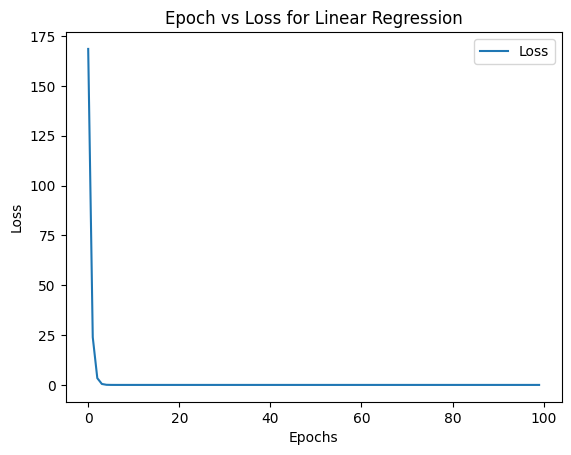

Learned parameters: w = 0.9258432984352112, b = -0.8938160538673401


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2], dtype=torch.float32).view(-1, 1)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6], dtype=torch.float32).view(-1, 1)


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)


model = LinearRegressionModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 100
losses = []

for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Backpropagate the loss
    optimizer.step()  # Update the parameters

    # Store the loss for plotting
    losses.append(loss.item())

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

# Plot the loss vs epoch graph
plt.plot(range(epochs), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch vs Loss for Linear Regression")
plt.legend()
plt.show()

# Print the learned parameters (w and b)
print(f"Learned parameters: w = {model.linear.weight.item()}, b = {model.linear.bias.item()}")

6. Implement multiple linear regression for the data provided below
Subject X1   X2   Y
1       3    8   -3.7
2       4    5    3.5
3       5    7    2.5
4       6    3    11.5
5       2    1    5.7

Verify your answer for the data point X1=3, X2=2.

Epoch [1/200], Loss: 20.88218879699707
Epoch [21/200], Loss: 1.8441299200057983
Epoch [41/200], Loss: 0.47483840584754944
Epoch [61/200], Loss: 0.3544486165046692
Epoch [81/200], Loss: 0.32417505979537964
Epoch [101/200], Loss: 0.3017677664756775
Epoch [121/200], Loss: 0.281296044588089
Epoch [141/200], Loss: 0.26224595308303833
Epoch [161/200], Loss: 0.2444935292005539
Epoch [181/200], Loss: 0.22794859111309052


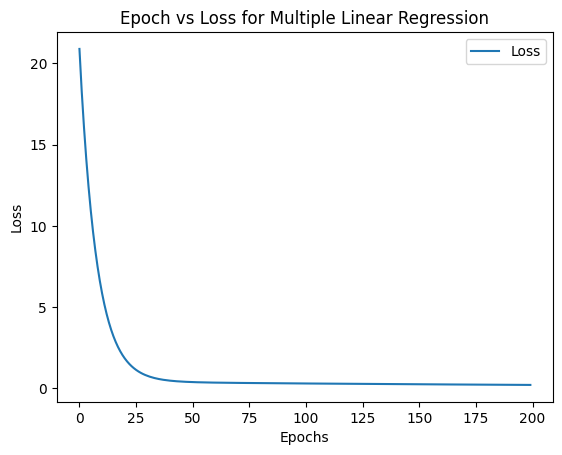

Learned parameters: w1 = 2.5387723445892334, w2 = -1.5963475704193115, b = 1.273097276687622
Prediction for X1=3, X2=2: 5.696719169616699


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

x_data = torch.tensor([
    [3.0, 8.0],
    [4.0, 5.0],
    [5.0, 7.0],
    [6.0, 3.0],
    [2.0, 1.0]
], dtype=torch.float32)

y_data = torch.tensor([-3.7, 3.5, 2.5, 11.5, 5.7], dtype=torch.float32).view(-1, 1)


# Define the Multiple Linear Regression Model using nn.Linear
class MultipleLinearRegressionModel(nn.Module):
    def __init__(self):
        super(MultipleLinearRegressionModel, self).__init__()
        # Input size = 2 (X1, X2), output size = 1 (Y)
        self.linear = nn.Linear(2, 1)  # Two input features (X1, X2)

    def forward(self, x):
        return self.linear(x)


model = MultipleLinearRegressionModel()

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 200
losses = []

for epoch in range(epochs):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()  
    loss.backward()  # Backpropagate the loss
    optimizer.step()  # Update the parameters

    losses.append(loss.item())

    # Print loss every 20 epochs
    if epoch % 20 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

# Plot the loss vs epoch graph
plt.plot(range(epochs), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch vs Loss for Multiple Linear Regression")
plt.legend()
plt.show()

w1 = model.linear.weight[0][0].item()
w2 = model.linear.weight[0][1].item()
b = model.linear.bias.item()

print(f"Learned parameters: w1 = {w1}, w2 = {w2}, b = {b}")

x_new = torch.tensor([[3.0, 2.0]], dtype=torch.float32)  # New data point for verification
y_new_pred = model(x_new)

print(f"Prediction for X1=3, X2=2: {y_new_pred.item()}")

7. Implement logistic regression
x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

Epoch [1/100], Loss: 3.594559907913208
Epoch [11/100], Loss: 0.6742187142372131
Epoch [21/100], Loss: 0.6565815806388855
Epoch [31/100], Loss: 0.6539787650108337
Epoch [41/100], Loss: 0.6367928981781006
Epoch [51/100], Loss: 0.6311829686164856
Epoch [61/100], Loss: 0.6190659999847412
Epoch [71/100], Loss: 0.6100656390190125
Epoch [81/100], Loss: 0.6002956032752991
Epoch [91/100], Loss: 0.5909247398376465


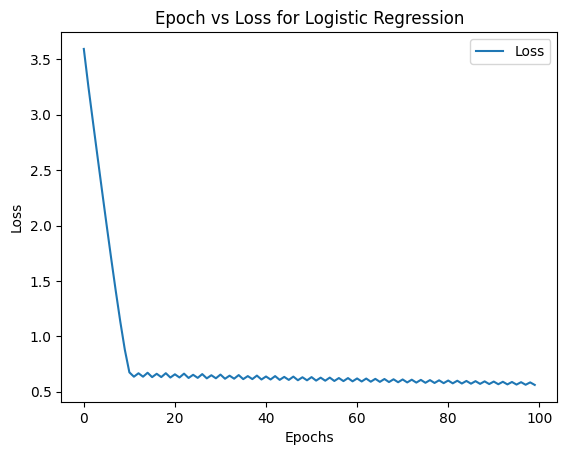

Learned parameters: w = 0.0473700575530529, b = 0.05788423493504524
Prediction for X=60: 0.94785076379776


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Data: X and y
x_data = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32).view(-1, 1)  # Reshape for 1 feature
y_data = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32).view(-1, 1)  # Labels


class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        # Input size = 1 (x), output size = 1 (y), use sigmoid activation
        self.linear = nn.Linear(1, 1)  # One input feature

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


model = LogisticRegressionModel()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
losses = []

for epoch in range(epochs):
    # Forward pass: Compute predicted y (probability)
    y_pred = model(x_data)

    # Compute the loss
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Backpropagate the loss
    optimizer.step()  # Update the parameters
    losses.append(loss.item())

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

# Plot the loss vs epoch graph
plt.plot(range(epochs), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch vs Loss for Logistic Regression")
plt.legend()
plt.show()

w = model.linear.weight.item()
b = model.linear.bias.item()
print(f"Learned parameters: w = {w}, b = {b}")

x_new = torch.tensor([[60.0]], dtype=torch.float32)
y_new_pred = model(x_new)

print(f"Prediction for X=60: {y_new_pred.item()}")